In [155]:
def get_coefs(points):
    p = dict()
    for i, j in enumerate(points):
        p[i+1] = j # shift to index 1
    
    # x: 0, 
    c_dict = dict()
    n = len(points)
    
    for i in range(1, n + 1):
        c_dict[str(i)] = p[i][1]
    
    for i in range(2, n + 1):
        for j in range(1, n - i + 2):
            k = ''
            pk1 = '' # previous key
            pk2 = ''
            
            for t in range(j, j + i):
                k += str(t)
            
            for t in range(j + 1, j + i):
                pk1 += str(t)
            
            for t in range(j, j + i - 1):
                pk2 += str(t)
            
            c_dict[k] = (c_dict[pk1] - c_dict[pk2]) / (p[j + i - 1][0] - p[j][0])
    
    r = []
    for i in range(1, n + 1):
        k = ''
        for j in range(1, i + 1):
            k += str(j)
        # print(f"k: {k}")
        r.append(c_dict[k])
    # return c_dict
    return r
    

In [199]:
def calc_polynomial_result(c, p, x):
    """
    c for coefficient
    p for known points
    x for input
    """
    n = len(c)
    result = 0
    
    for i in range(n):
        curr_term = c[i]
        for j in range(i):
            curr_term *= (x - p[j][0])
        result += curr_term
        
    return result

In [197]:
def PolyNewton(absc, ordi, x):
    absc = array(absc)
    ordi = array(ordi)
    if shape(absc) != shape(ordi):
        raise ValueError("Abscissas and ordinates have different length!")
    if len(shape(absc)) != 1:
        raise ValueError("Abscissas and ordinates must be 1D objects!")
    
    points = [list(pair) for pair in zip(absc, ordi)]
    
    c = get_coefs(points)
    print(f"check length: {len(c)}")
    print(f"check c: {(c)}")
    
    return calc_polynomial_result(c, points, x)

check length: 9
check c: [0.04818560380725758, 0.030944883178972756, 0.02083609879864839, 0.017233210707946256, -0.0016880869009303268, -0.006872719592596233, 0.0041421399770817866, -0.0013325919497314054, 0.0002998331886895662]


Text(0.5, 1.0, 'Maximum absolute error: 10.0169')

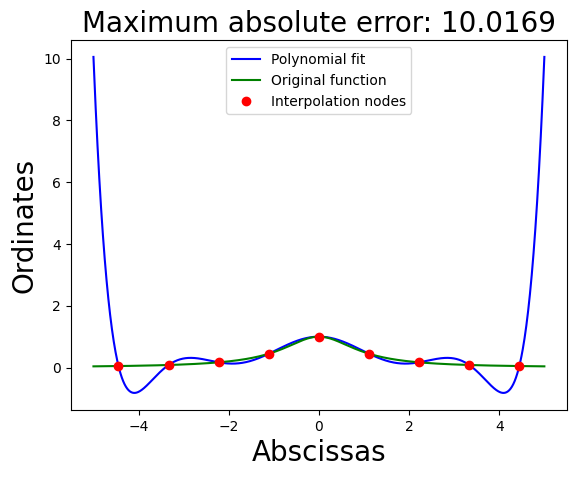

In [191]:
from pylab import *
ion()
from scipy.linalg import solve

ion()
function = lambda x: 1./(1+x**2)
interval = [-5, 5]
Npts = 9
L = interval[1]-interval[0]
x = linspace(interval[0], interval[1], 1001)


# constant interval abscissas
a = linspace(interval[0] + L/Npts/2, interval[1] - L/Npts/2 , Npts)
o = function(a)
p = PolyNewton(a, o, x)

figure(1)
plot(x, p,           'b-',
     x, function(x), 'g-',
     a, o,           'or')
xlabel("Abscissas", fontsize=20)
ylabel("Ordinates", fontsize=20)
legend(["Polynomial fit", "Original function", "Interpolation nodes"],
       loc="upper center")
title("Maximum absolute error: {:7.4f}".format(amax(fabs(p - function(x)))), fontsize=20 )

In [192]:
def get_Chebishev_zeros(n: int):
    import math
    result = []
    for i in range(1, n + 1):
        result.append(math.cos(((2 * i - 1) * math.pi) / (2 * n)))
    return result

To rescale the variable of a function defined on the interval $[-1, 1]$ so that it is defined on a new interval $[a, b]$, we can use a linear transformation. The idea is to map the old interval $[-1, 1]$ to the new interval $[a, b]$ by finding a function that takes any $x$ in $[-1, 1]$ and gives a corresponding value in $[a, b]$.

The transformation can be achieved using the formula:
$$
x' = \frac{b-a}{2} x + \frac{a+b}{2}
$$
Here, $x'$ is the new variable corresponding to $x$, and $x$ is the original variable in the interval $[-1, 1]$. This formula linearly transforms $x$ from the interval $[-1, 1]$ to $x'$ in the interval $[a, b]$.center of $[-1, 1]$) to the center of $[a, b]$, which is $\frac{a+b}{2}$.

This linear transformation ensures that $x = -1$ maps to $x' = a$ and $x = 1$ maps to $x' = b$, effectively rescaling and repositioning the function $f(x)$ from the interval $[-1, 1]$ to the interval $[a, b]$.

To calculate the result backward, we have

$$
x = (\frac{2}{b - a}) \cdot (x' - \frac{a + b}{2})
$$

In [193]:
def get_Chebishev_zeros_scaled(a: int, b: int, n: int):
    raw_zeros = get_Chebishev_zeros(n = n)
    return [((b - a) / 2) * i + ((a + b) / 2) for i in raw_zeros]

check length: 20
check c: [0.038690550422591154, -0.015462720567886343, 0.004830839558113001, -0.00143143976830096, 0.0004344137938126684, -0.0001412664569678584, 5.027015531566003e-05, -1.850433026753894e-05, 2.8509336921962193e-06, 1.2183280591270862e-05, -2.47070301677643e-06, -6.265730275669977e-06, -3.256242975115437e-06, -9.363920741079386e-07, -1.4557480381946637e-07, 7.699773378879622e-09, 1.4347940347116174e-08, 6.235067563079319e-09, 2.0317015119018915e-09, 5.863624648355395e-10]


Text(0.5, 1.0, 'Maximum absolute error:  0.4399')

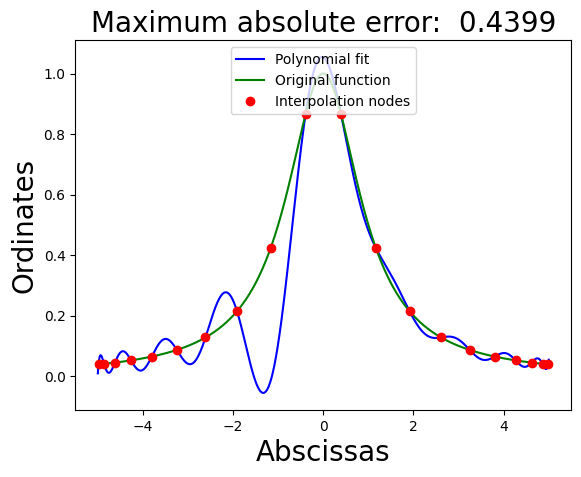

In [214]:

ion()
function = lambda x: 1./(1+x**2)
interval = [-5, 5]
Npts = 20
L = interval[1]-interval[0]
x = linspace(interval[0], interval[1], 1001)


# constant interval abscissas
a = get_Chebishev_zeros_scaled(a = interval[0], b = interval[1], n = Npts)
o = [function(i) for i in a]
p = PolyNewton(a, o, x)

figure(1)
plot(x, p,           'b-',
     x, function(x), 'g-',
     a, o,           'or')
xlabel("Abscissas", fontsize=20)
ylabel("Ordinates", fontsize=20)
legend(["Polynomial fit", "Original function", "Interpolation nodes"],
       loc="upper center")
title("Maximum absolute error: {:7.4f}".format(amax(fabs(p - function(x)))), fontsize=20 )